Adding device geo loaction based on its address

In [2]:
pip install geopy

     |████████████████████████████████| 119 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
path = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/Serial match Device number.csv'

In [15]:
import pandas as pd
from geopy.geocoders import Nominatim

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(path)

# Create a geolocator object using Nominatim
geolocator = Nominatim(user_agent='https://cs-people.bu.edu/zw100107',timeout=10)

# Define a function to get the latitude and longitude of an address
def get_coordinates(address):
    location = geolocator.geocode(address)
    if location:
        return (location.latitude, location.longitude)
    else:
        return (None, None)

# Apply the function to each row in the DataFrame to get the coordinates
df['Latitude'], df['Longitude'] = zip(*df['Address'].apply(get_coordinates))

# Save the updated DataFrame to a new CSV file
df.to_csv('Device Geo Locations.csv', index=False)


Plotting each device's psivalue and temperature graph, this is the original documents

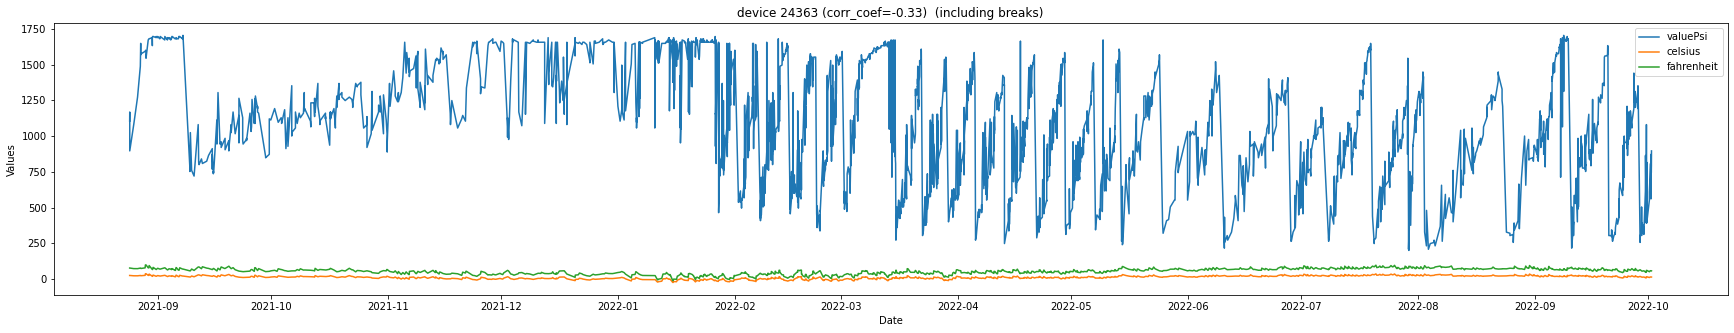

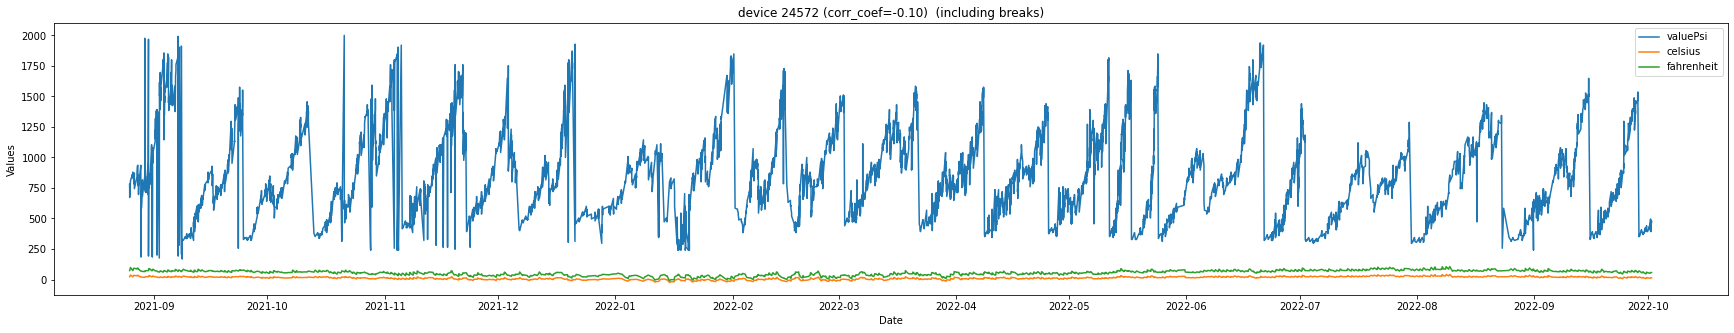

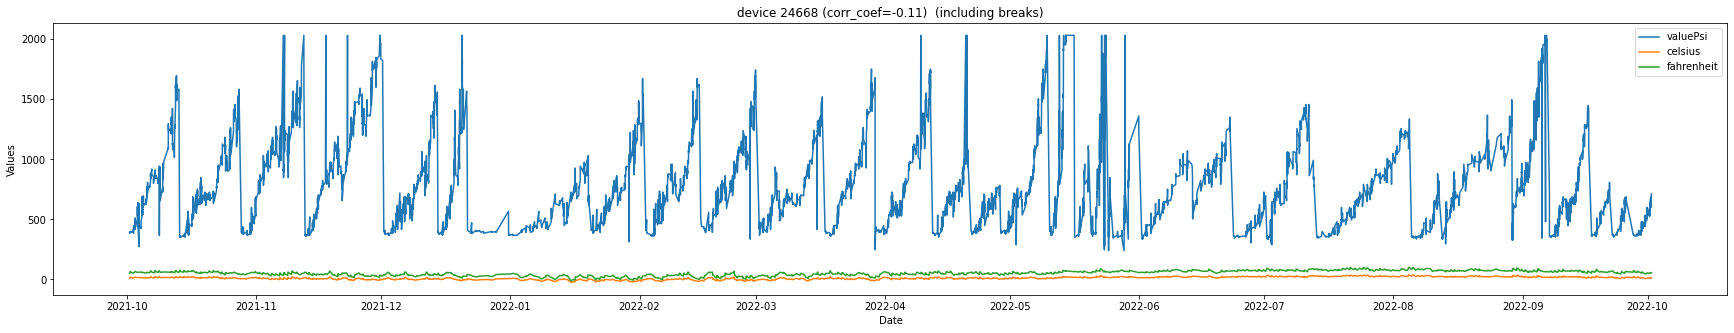

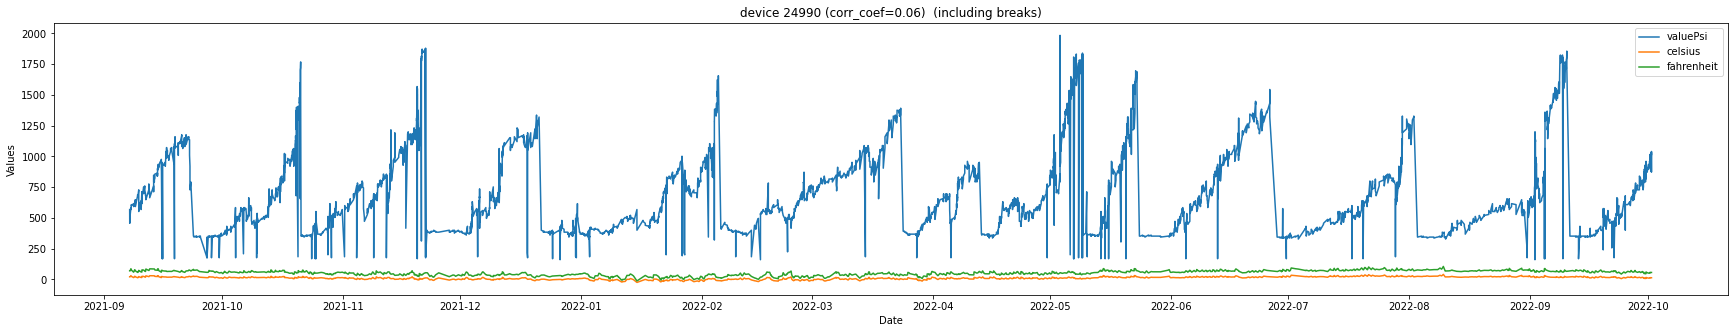

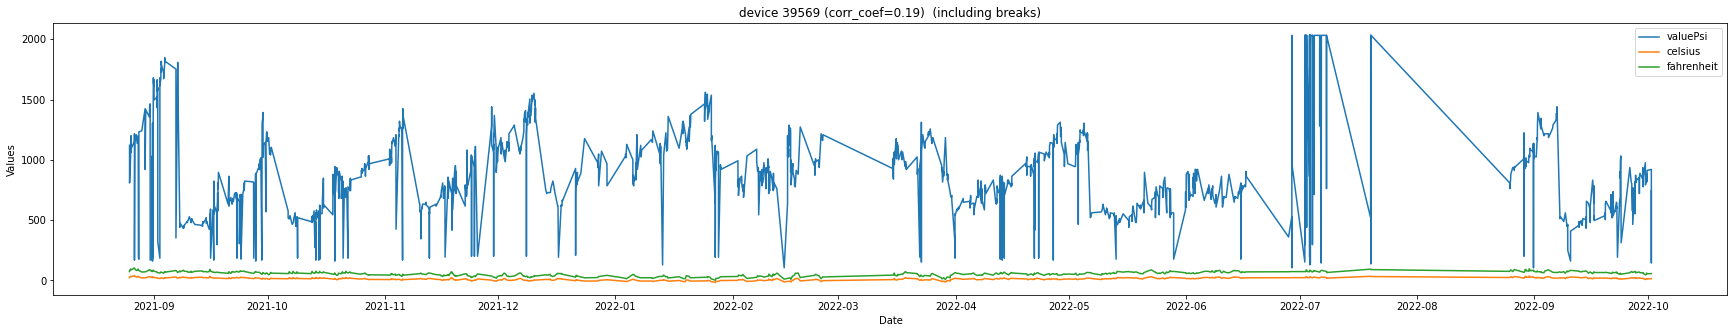

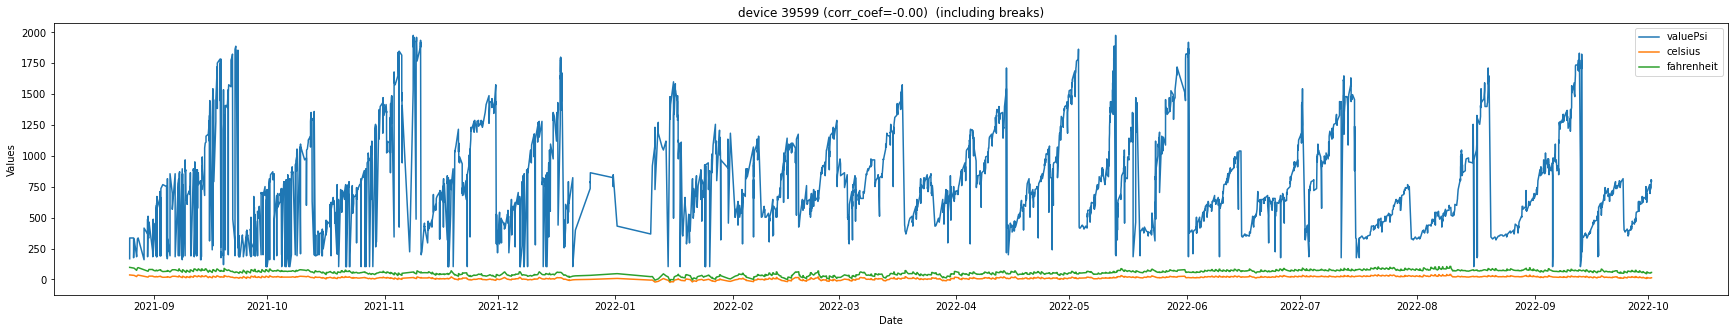

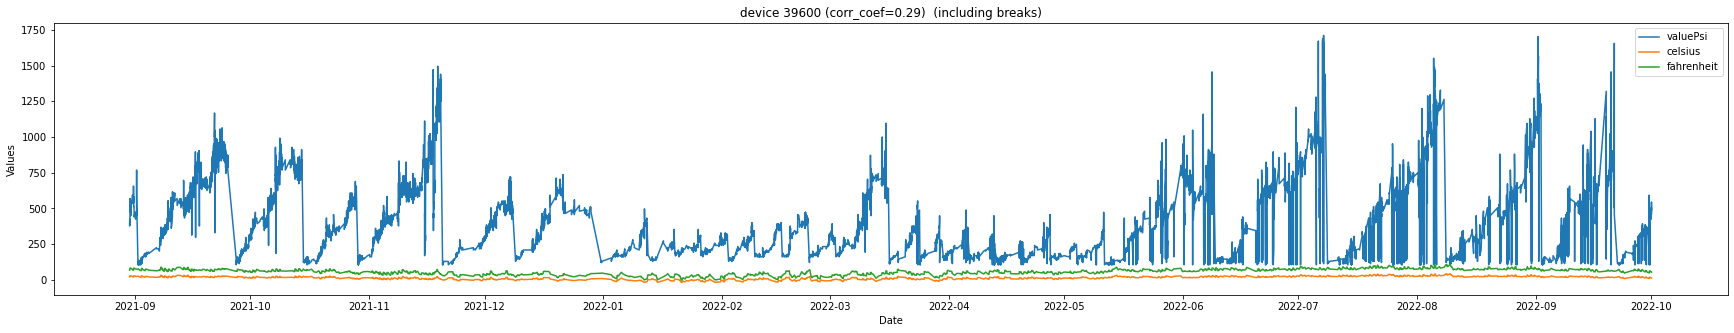

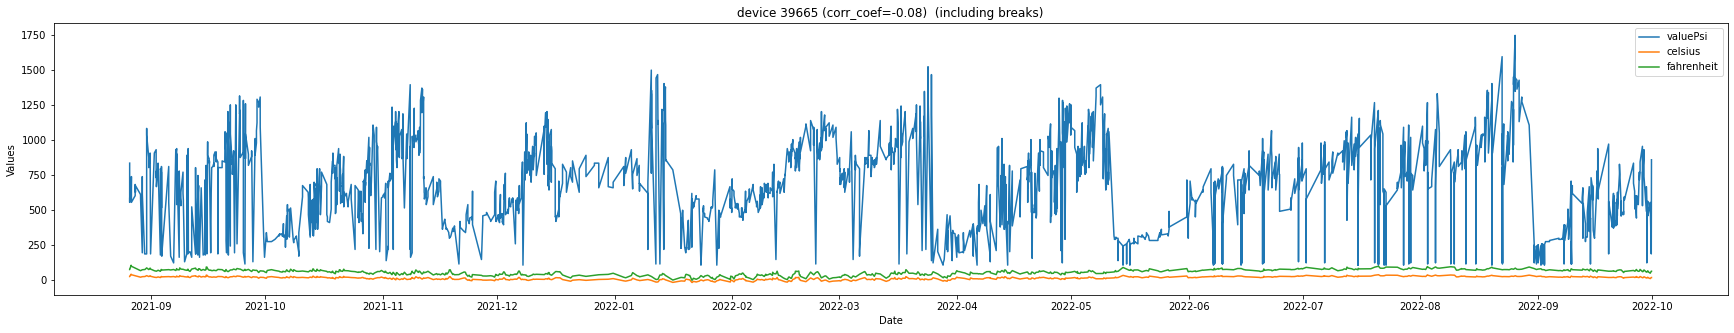

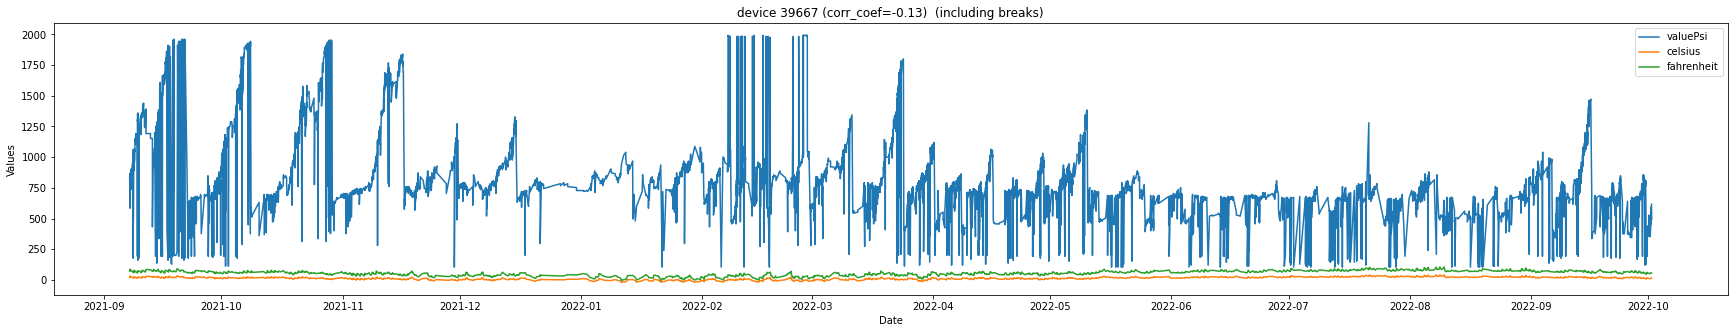

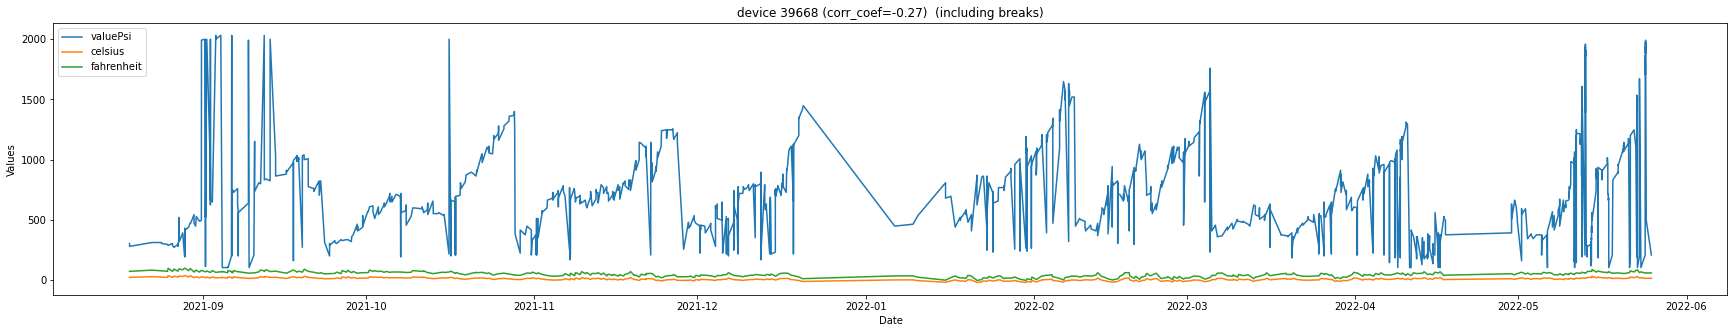

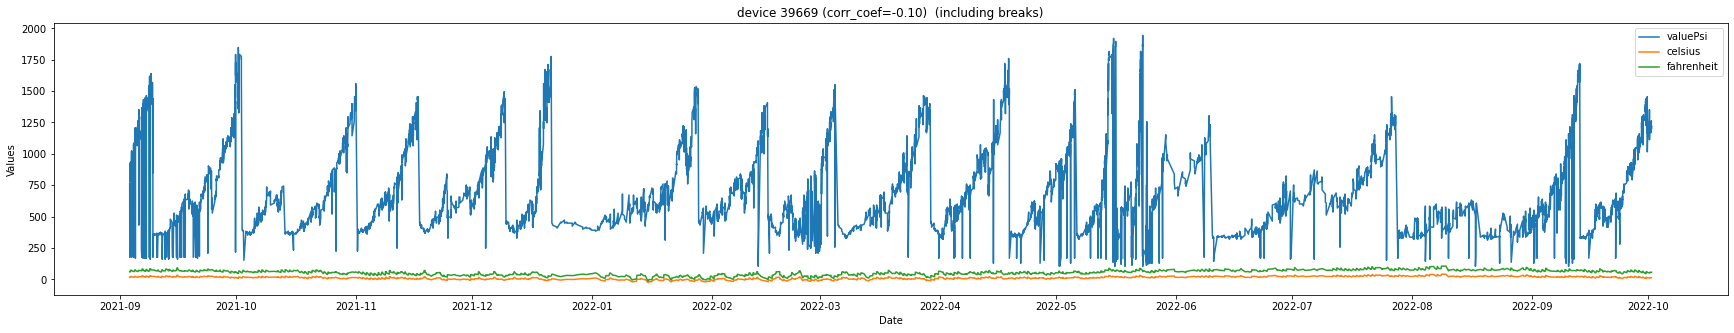

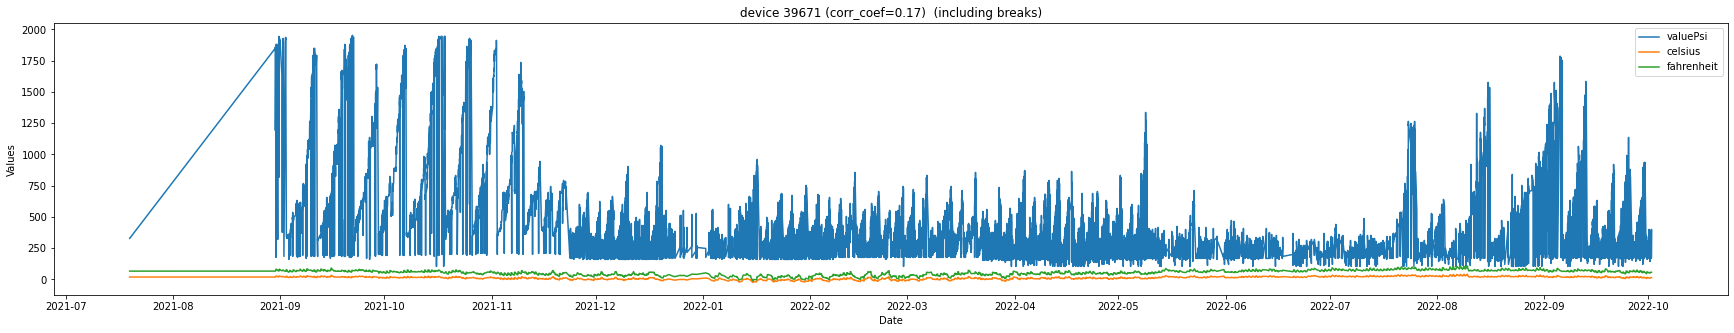

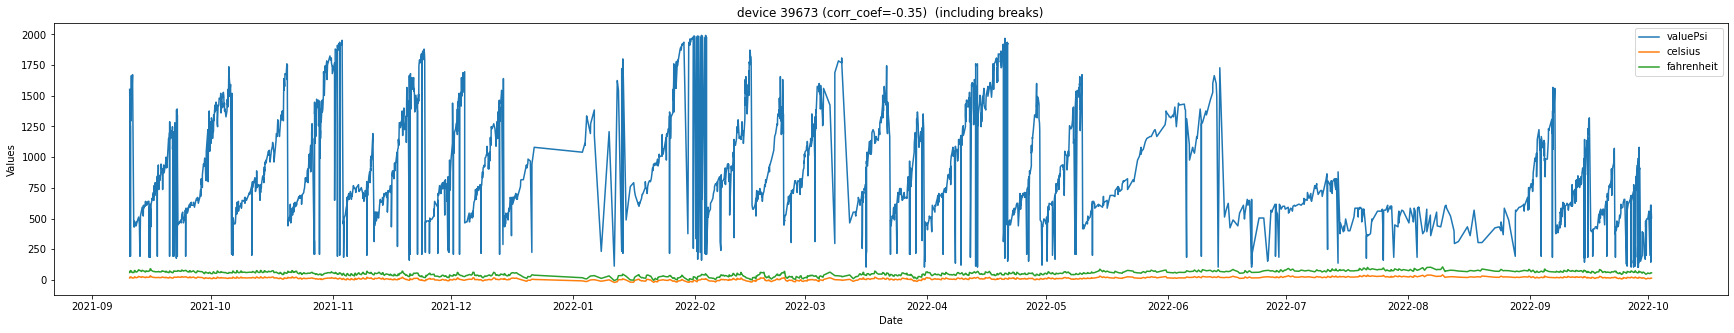

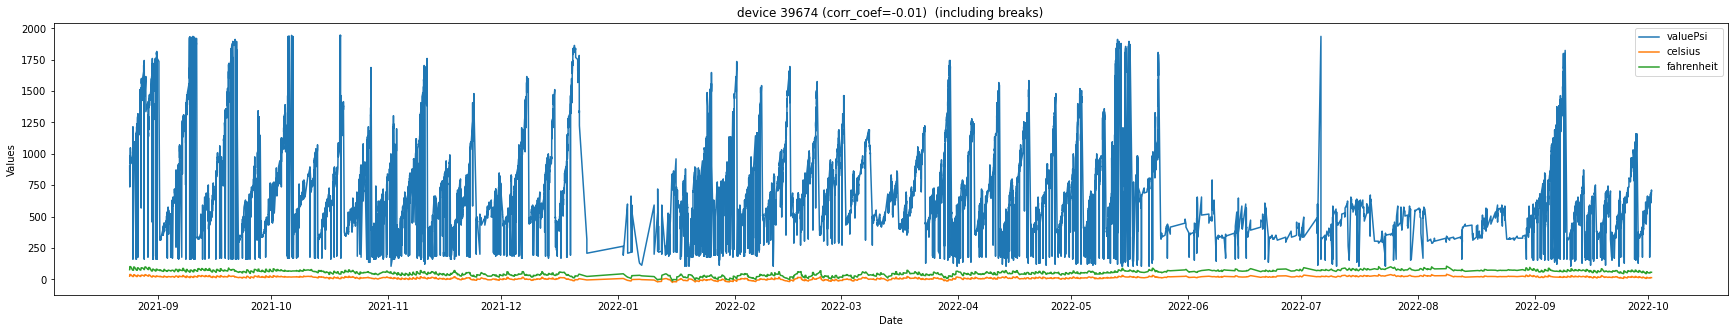

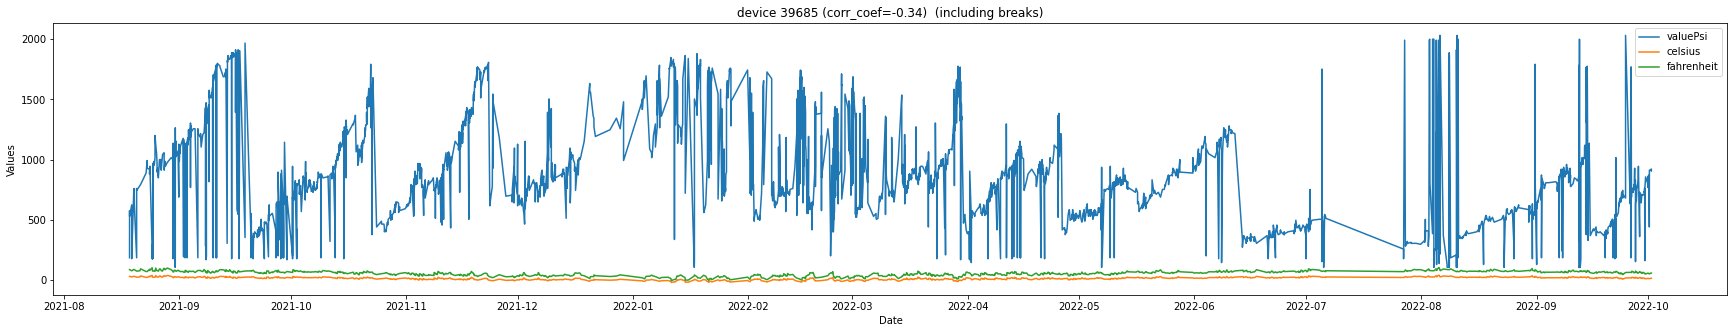

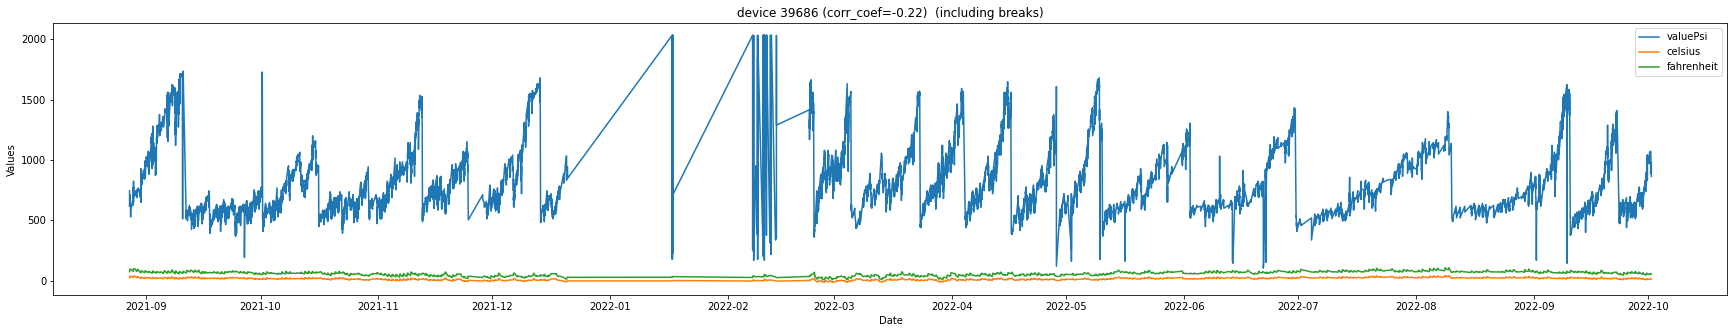

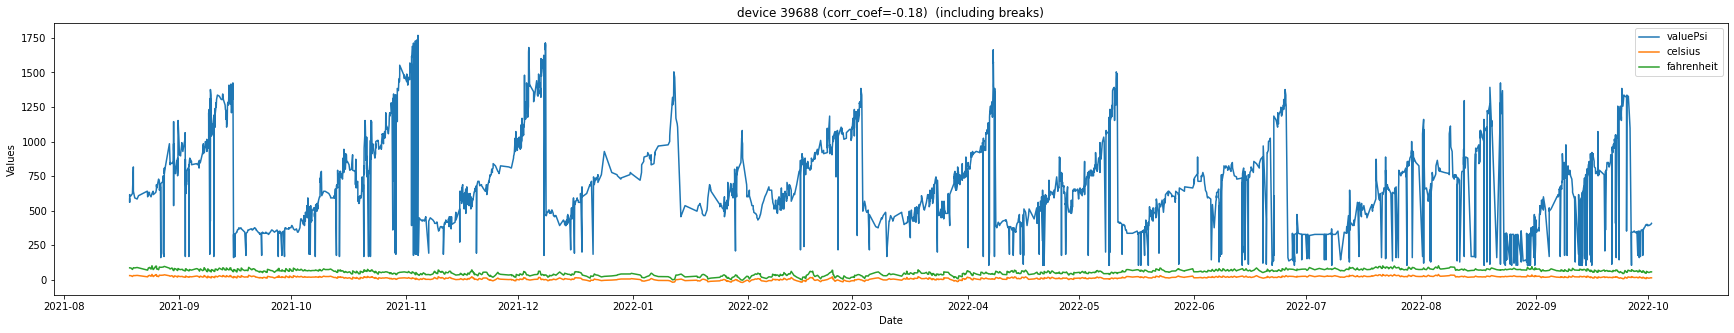

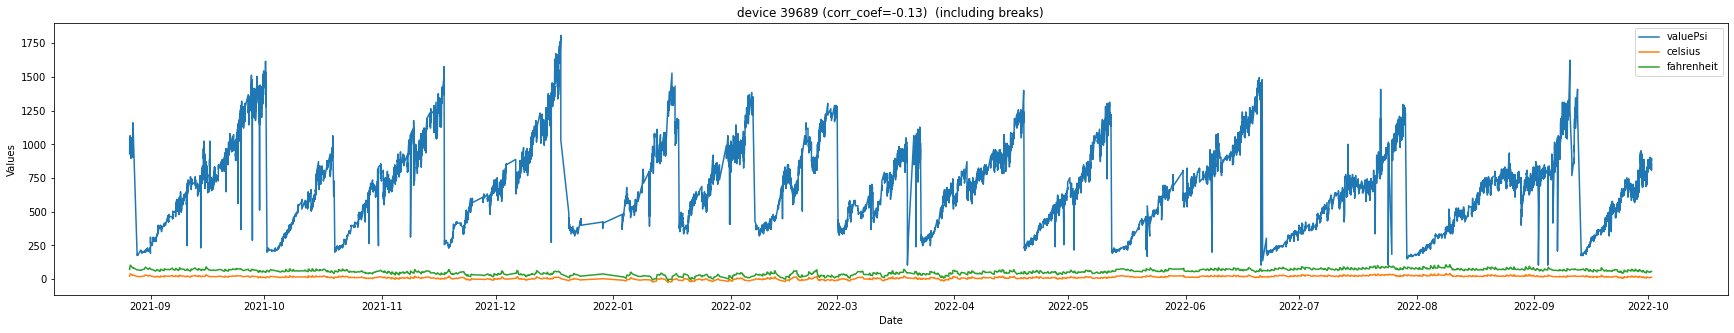

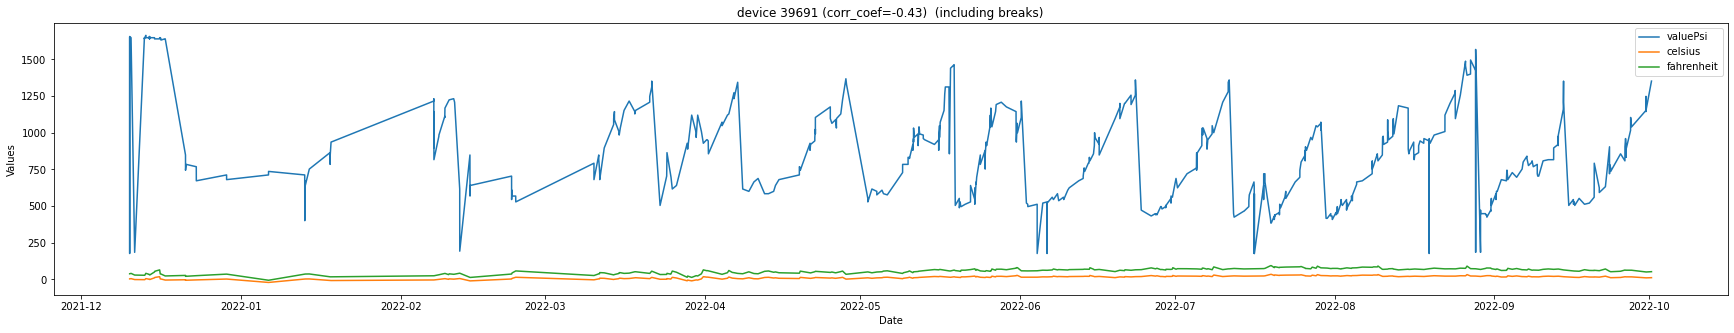

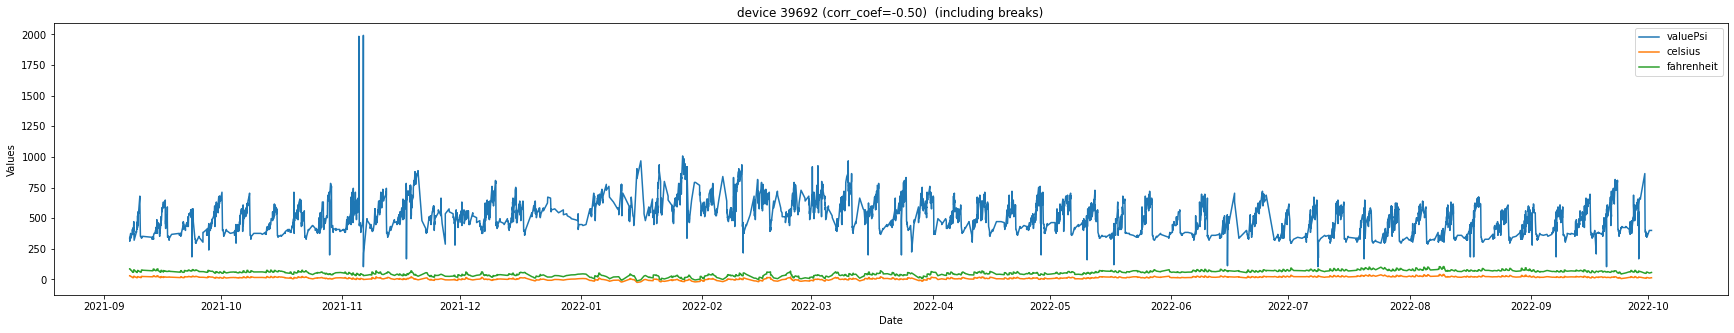

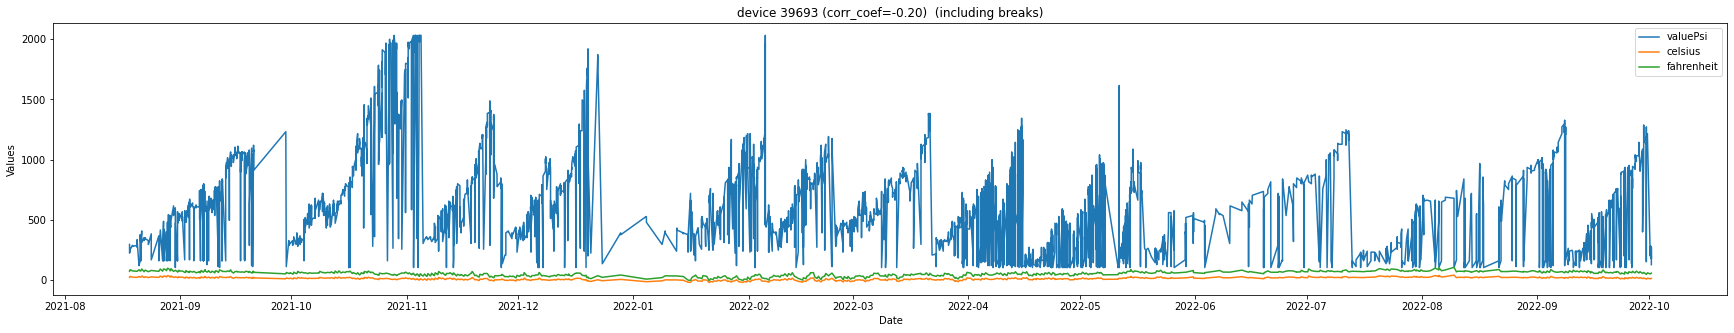

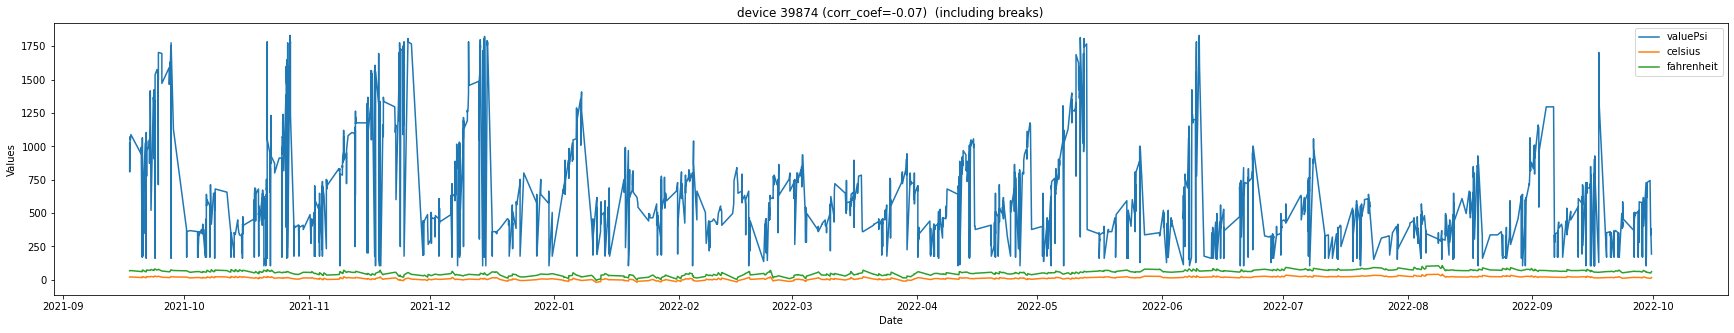

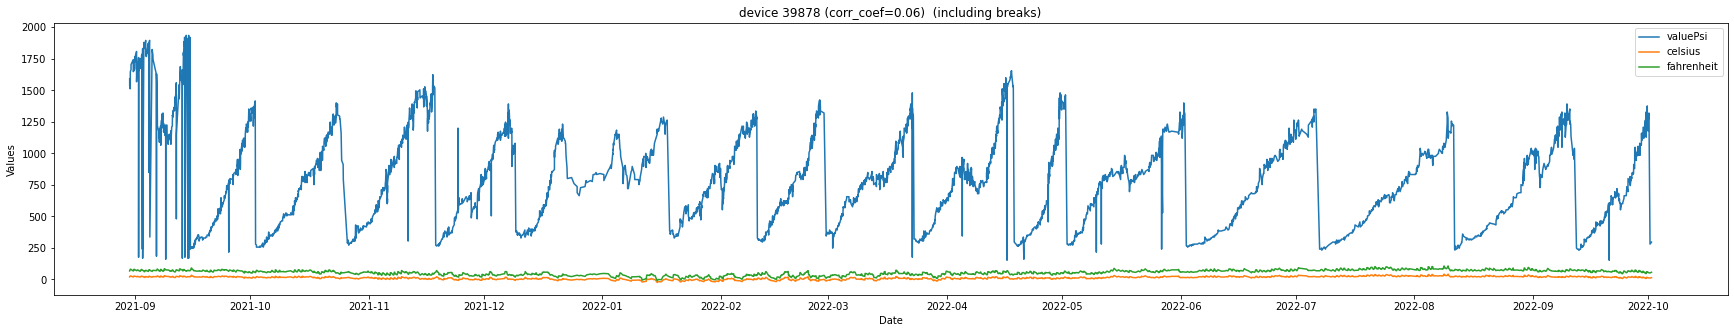

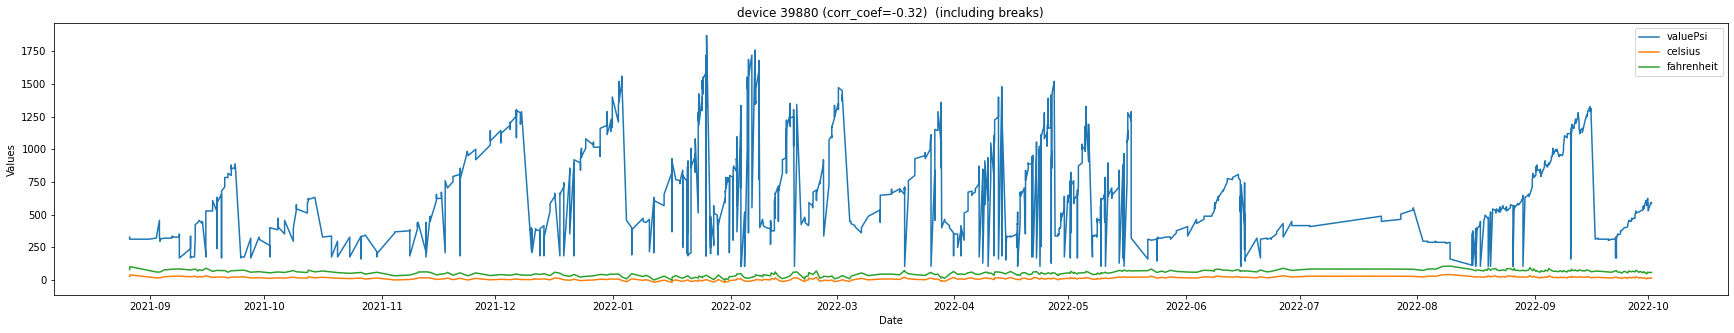

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
from scipy.stats import pearsonr

# Set the directory path where the CSV files are stored
directory = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/combined_reading_device'

# List all the CSV files in the directory and sort them by file name
csv_files = sorted([file for file in os.listdir(directory) if file.endswith('.csv')])

# Create a PDF file to save the plots
pdf_pages = PdfPages('lineChart_for_each_device_whole_dates.pdf')

# Loop over each CSV file and plot it
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, parse_dates=['readingDtUtz'], index_col='readingDtUtz')
    df = df.dropna()
    # Extract the five-digit device number from the file name
    device_number = file.split('_')[1]
    # Calculate the correlation coefficient between temperature and valuePsi
    corr_coef, _ = pearsonr(df['fahrenheit'], df['valuePsi'])
    # Create the plot
    fig, ax = plt.subplots(figsize=(30, 5))
    ax.plot(df.index, df['valuePsi'], label='valuePsi')
    ax.plot(df.index, df['celsius'], label='celsius')
    ax.plot(df.index, df['fahrenheit'], label='fahrenheit')
    ax.set_title(f"device {device_number} (corr_coef={corr_coef:.2f})  (including breaks)")
    ax.set_xlabel('Date')
    ax.set_ylabel('Values')
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.legend()
    # Save the plot to the PDF file
    pdf_pages.savefig()
    plt.show()
    plt.close()

# Close the PDF file
pdf_pages.close()


Here is the graph showing the original correlation coefficient of temp and psi for each device

device 24363 has coef: -0.3284953822461767
device 39600 has coef: 0.2916825486497696
device 39668 has coef: -0.2747064822777352
device 39673 has coef: -0.3488564740065114
device 39685 has coef: -0.3359949685972693
device 39686 has coef: -0.22119098005066662
device 39691 has coef: -0.42659629975565216
device 39692 has coef: -0.49591575155844825
device 39693 has coef: -0.20467896119515963
device 39880 has coef: -0.32066856342105976


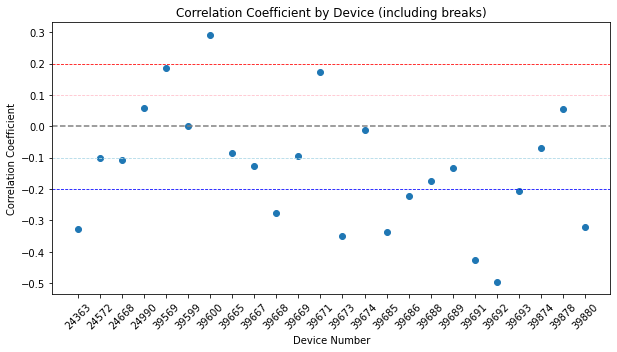

In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the directory path where the CSV files are stored
directory = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/combined_reading_device'

# List all the CSV files in the directory and sort them by file name
csv_files = sorted([file for file in os.listdir(directory) if file.endswith('.csv')])

# Initialize lists to store the device numbers and their corresponding correlation coefficients
device_nums = []
correlation_coeffs = []

useful_devices_whole_dates = {}
device_whole_dates_corr = {}

# Loop over each CSV file and compute the correlation coefficient
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df = df.dropna()
    corr_coef = df['fahrenheit'].corr(df['valuePsi'])
    device_num = file.split('_')[1]
    device_nums.append(device_num)
    correlation_coeffs.append(corr_coef)
    
    if abs(corr_coef) >= 0.2:
        print("device",device_num, "has coef:", corr_coef)
        useful_devices_whole_dates[device_num] = round(corr_coef,2)
    device_whole_dates_corr[device_num] = round(corr_coef,2)

# Plot a scatter plot of the correlation coefficients for each device
plt.figure(figsize=(10, 5))
plt.scatter(device_nums, correlation_coeffs)
plt.xlabel('Device Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient by Device (including breaks)')
plt.xticks(rotation=45)
plt.axhline(y=0.1, linestyle='--', color='pink', linewidth=0.8)
plt.axhline(y=-0.1, linestyle='--', color='lightblue', linewidth=0.8)
plt.axhline(y=0.2, linestyle='--', color='red', linewidth=0.8)
plt.axhline(y=-0.2, linestyle='--', color='blue', linewidth=0.8)
plt.axhline(y=0, linestyle='--', color='gray')
plt.savefig('Correlation_Coefficient_by_Device_whole_dates.png')
plt.show()


If we consider ±0.2 as a boundary to decide there is some relationship. Then we can look at these listed below



In [22]:
print(useful_devices_whole_dates)
print()
print(device_whole_dates_corr)

{'24363': -0.33, '39600': 0.29, '39668': -0.27, '39673': -0.35, '39685': -0.34, '39686': -0.22, '39691': -0.43, '39692': -0.5, '39693': -0.2, '39880': -0.32}

{'24363': -0.33, '24572': -0.1, '24668': -0.11, '24990': 0.06, '39569': 0.19, '39599': -0.0, '39600': 0.29, '39665': -0.08, '39667': -0.13, '39668': -0.27, '39669': -0.1, '39671': 0.17, '39673': -0.35, '39674': -0.01, '39685': -0.34, '39686': -0.22, '39688': -0.18, '39689': -0.13, '39691': -0.43, '39692': -0.5, '39693': -0.2, '39874': -0.07, '39878': 0.06, '39880': -0.32}


now ignoring summer break and winter break:

2021 Summer Break: May 23 - September 1

2021 Winter Break: December 19 - January 19

2022 Summer Break: May 14 - September 5



In [31]:
import csv
import os
from datetime import datetime

# Define date ranges to exclude
exclude_dates = [
    (datetime(2021, 5, 23), datetime(2021, 9, 1)),
    (datetime(2021, 12, 19), datetime(2022, 1, 19)),
    (datetime(2022, 5, 14), datetime(2022, 9, 5))
]

# Define input and output directories
input_dir = "/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/combined_reading_device"
output_dir = "/Users/zeqi/Desktop/cs506.nosync/Project/Code/CPA/Combined_devices_without_breaks"

# Loop through input files
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Define output filename
        output_filename = filename[:-4] + "_without_breaks.csv"
        # Open input and output files
        with open(os.path.join(input_dir, filename), "r") as input_file, \
             open(os.path.join(output_dir, output_filename), "w", newline="") as output_file:
            # Create CSV reader and writer objects
            reader = csv.DictReader(input_file)
            writer = csv.DictWriter(output_file, fieldnames=reader.fieldnames)
            writer.writeheader()
            # Loop through rows in input file
            for row in reader:
                # Convert readingDtUtz attribute to datetime object
                reading_dt = datetime.fromisoformat(row["readingDtUtz"])
                # Check if readingDtUtz falls within any of the excluded date ranges
                exclude = False
                for start_date, end_date in exclude_dates:
                    if start_date <= reading_dt <= end_date:
                        exclude = True
                        break
                # Write row to output file if it doesn't fall within any excluded date ranges
                if not exclude:
                    writer.writerow(row)


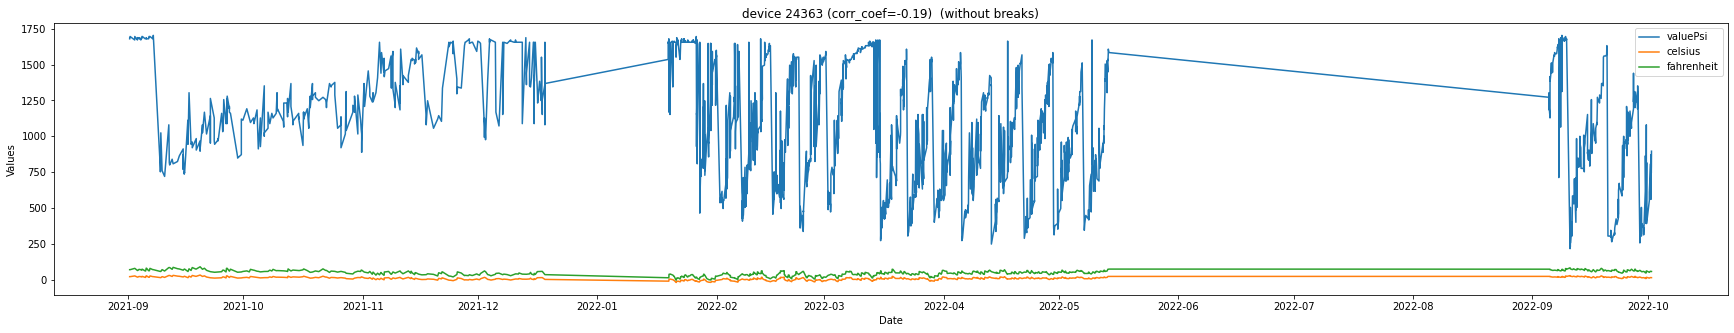

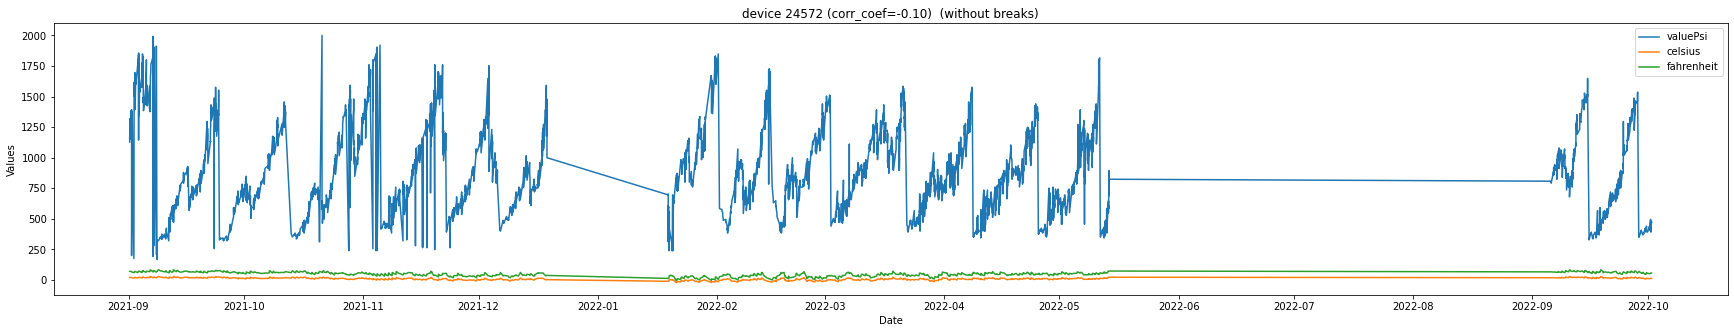

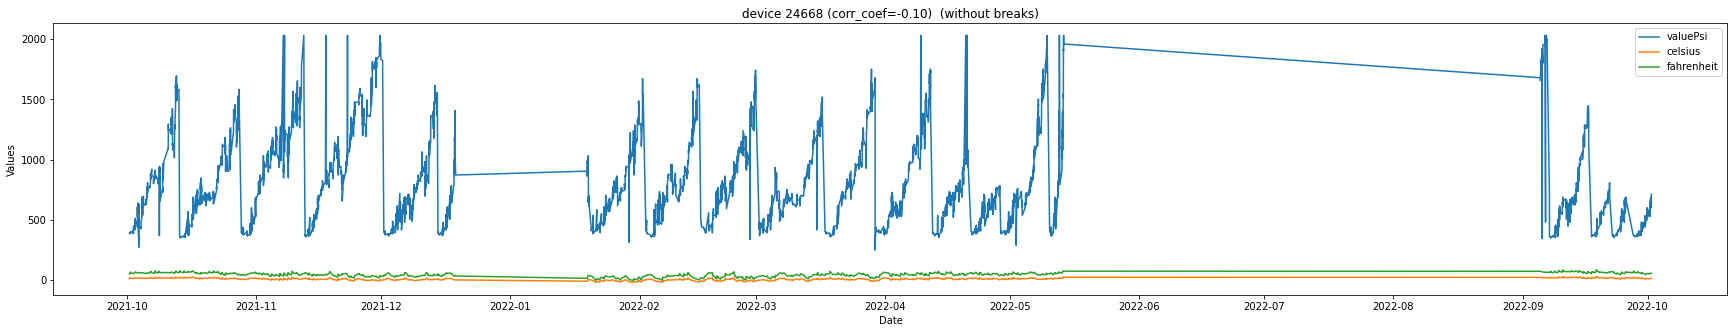

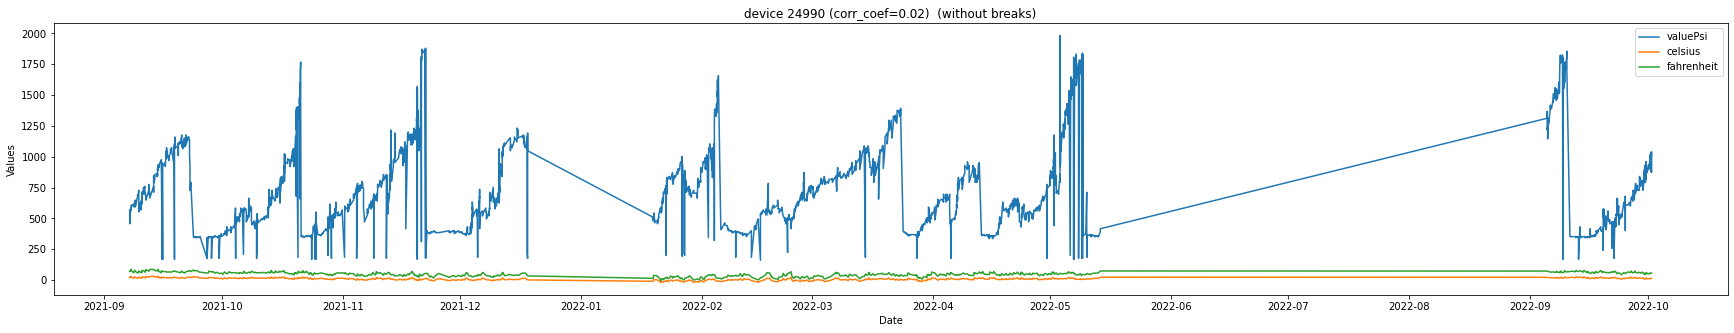

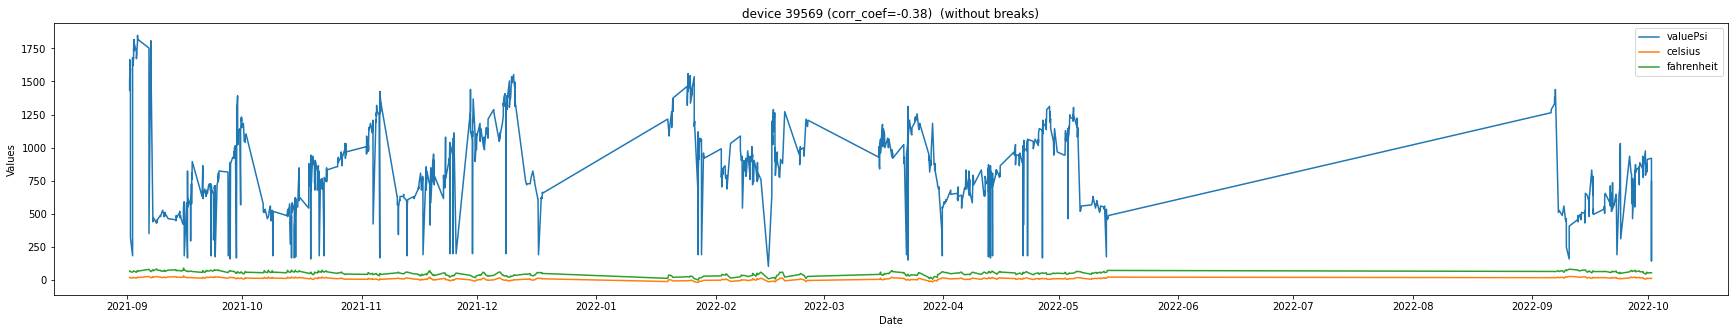

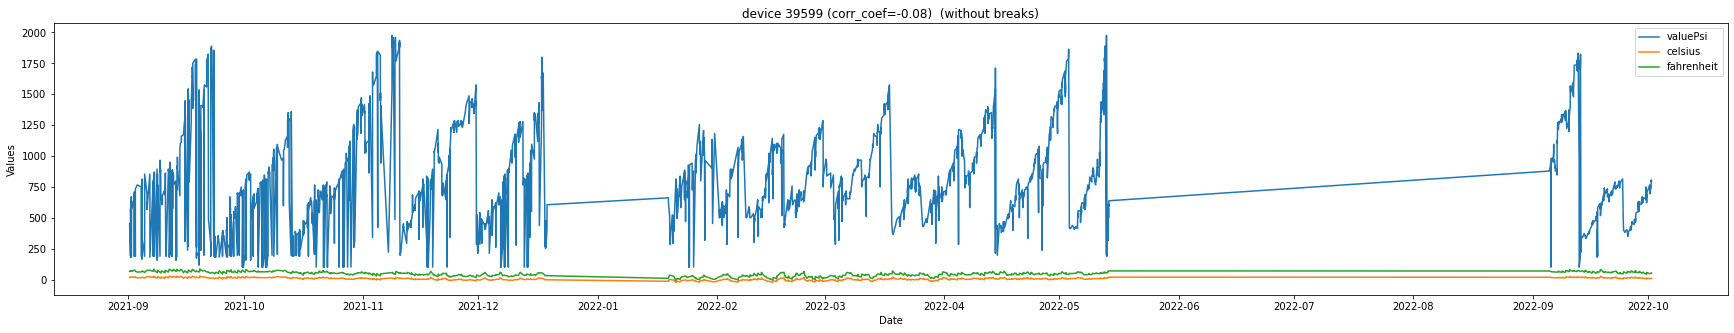

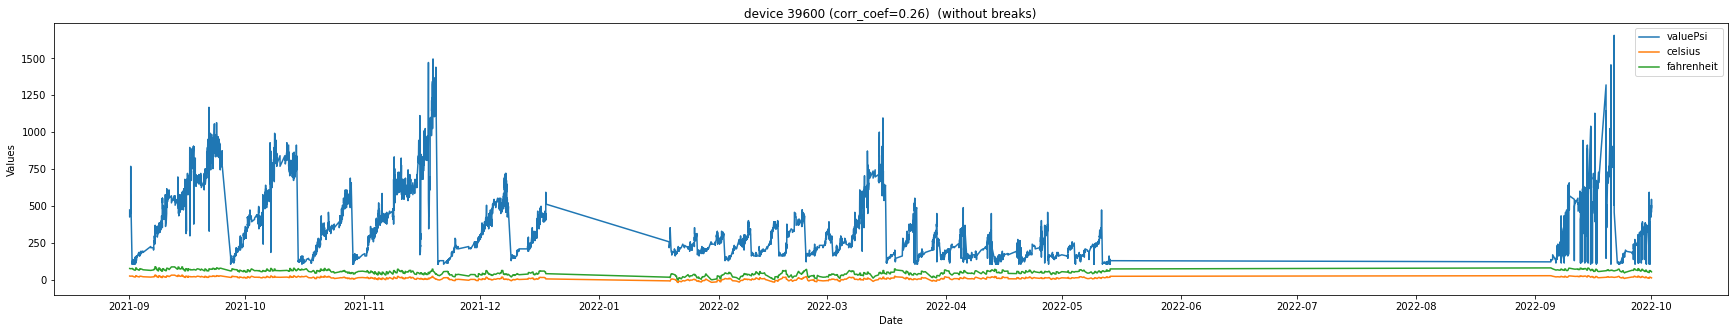

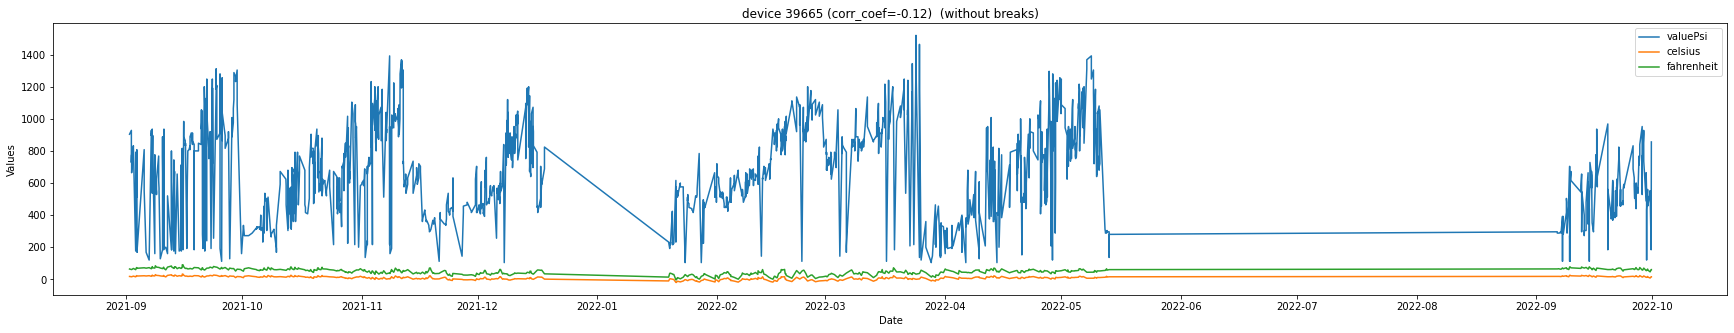

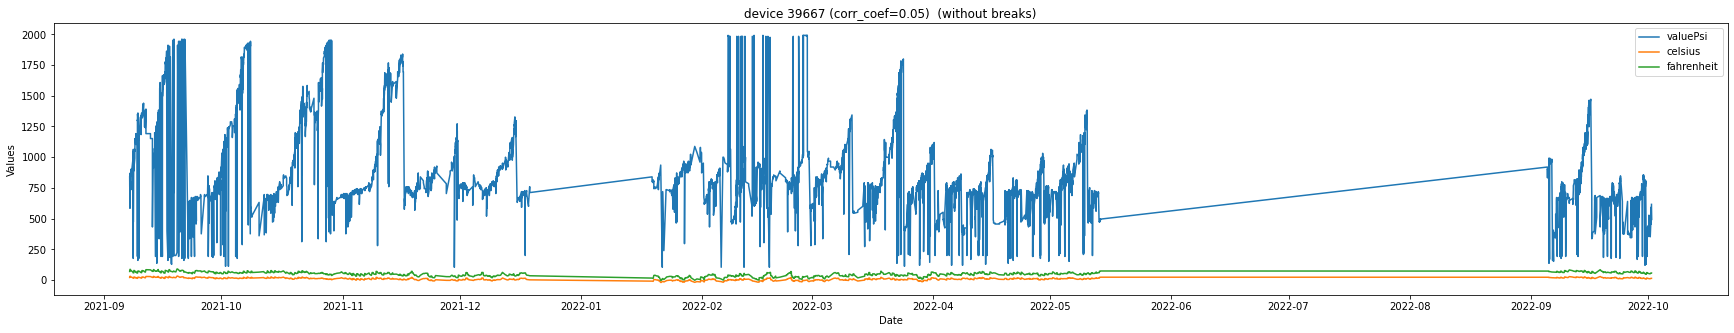

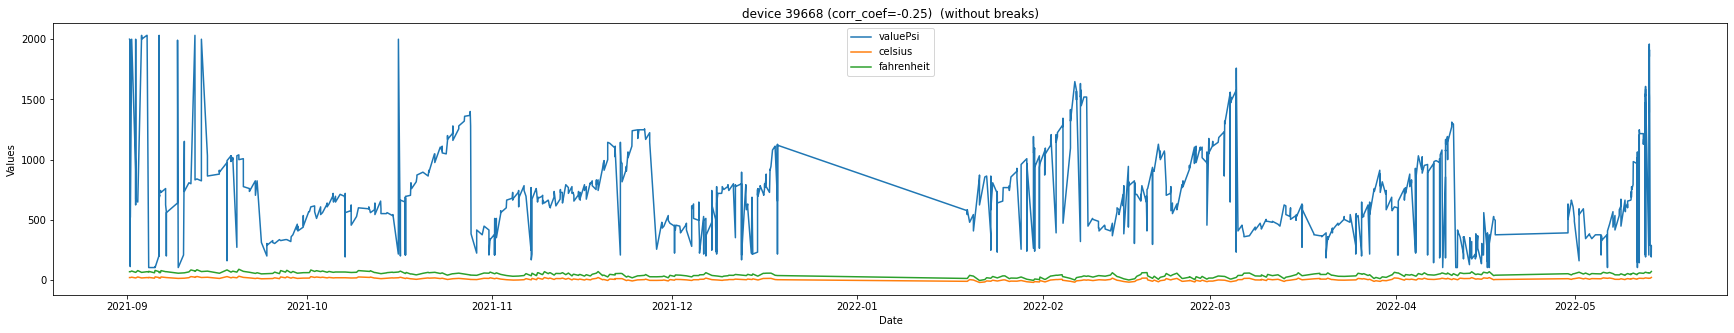

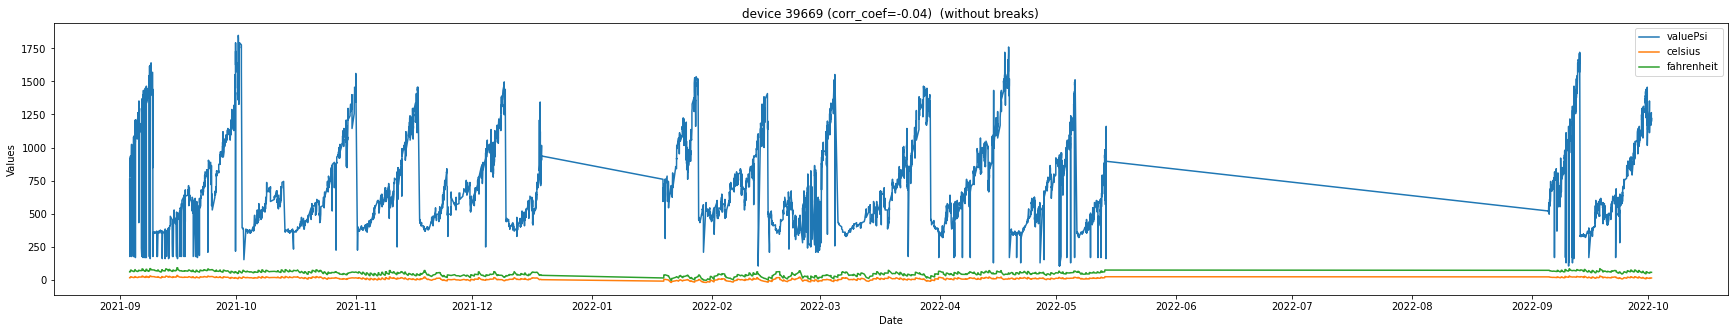

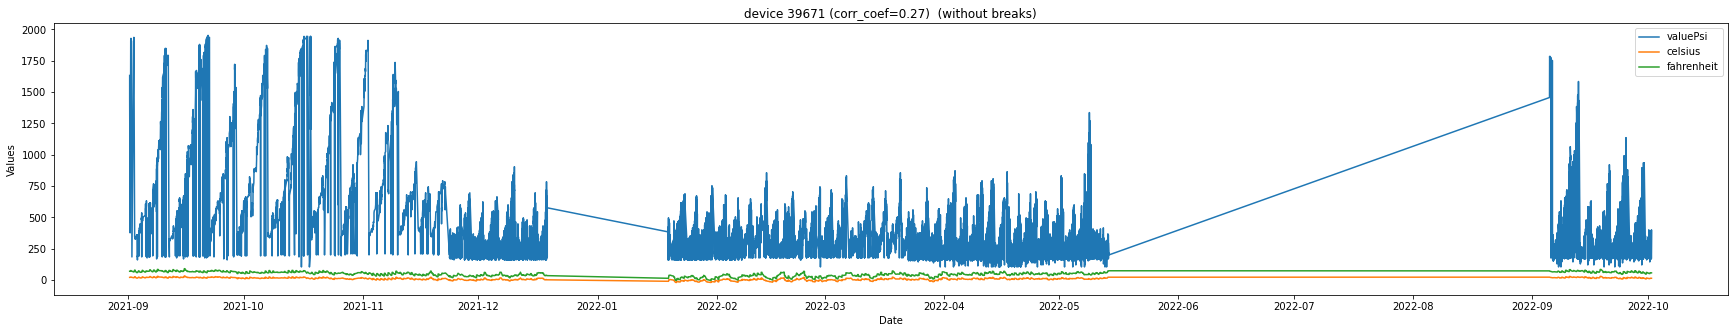

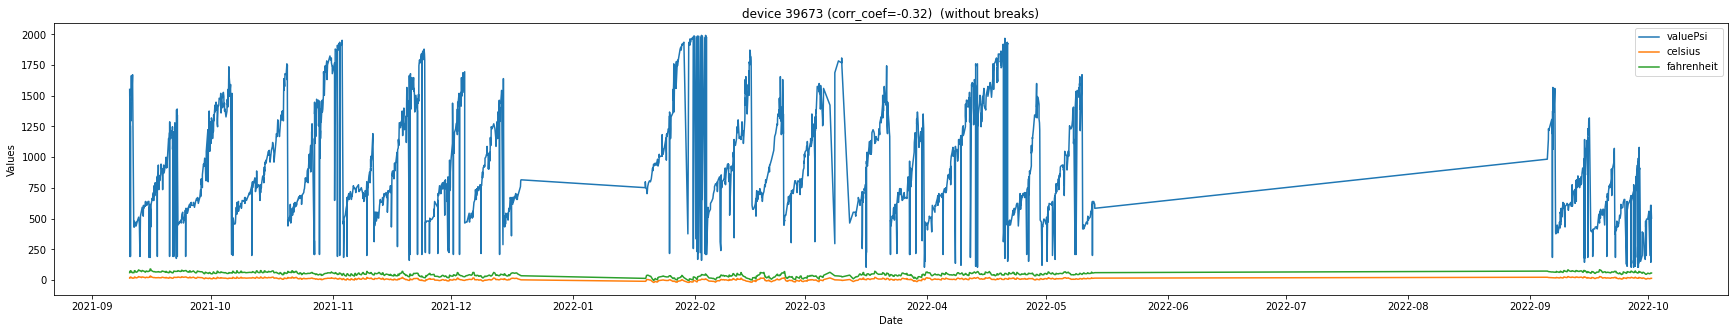

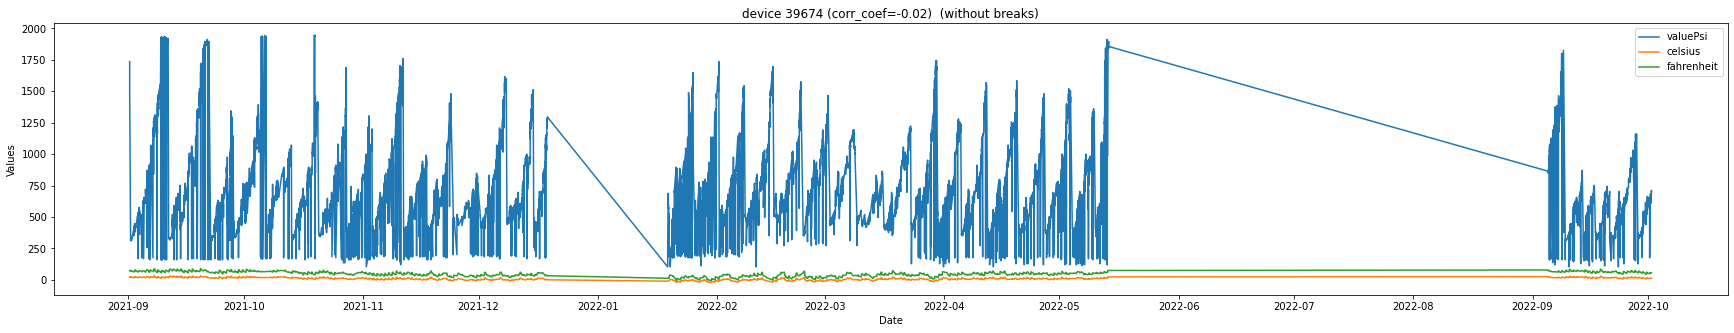

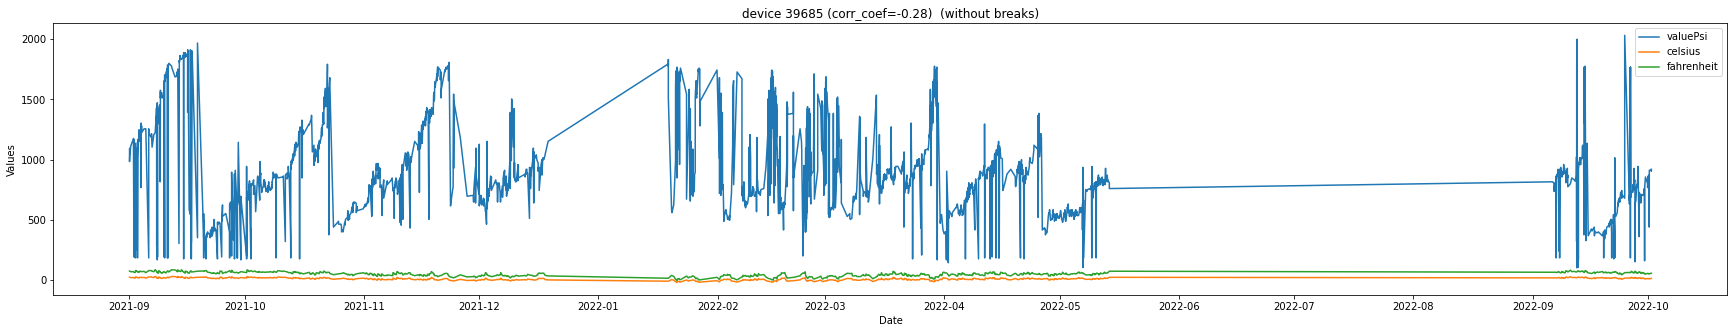

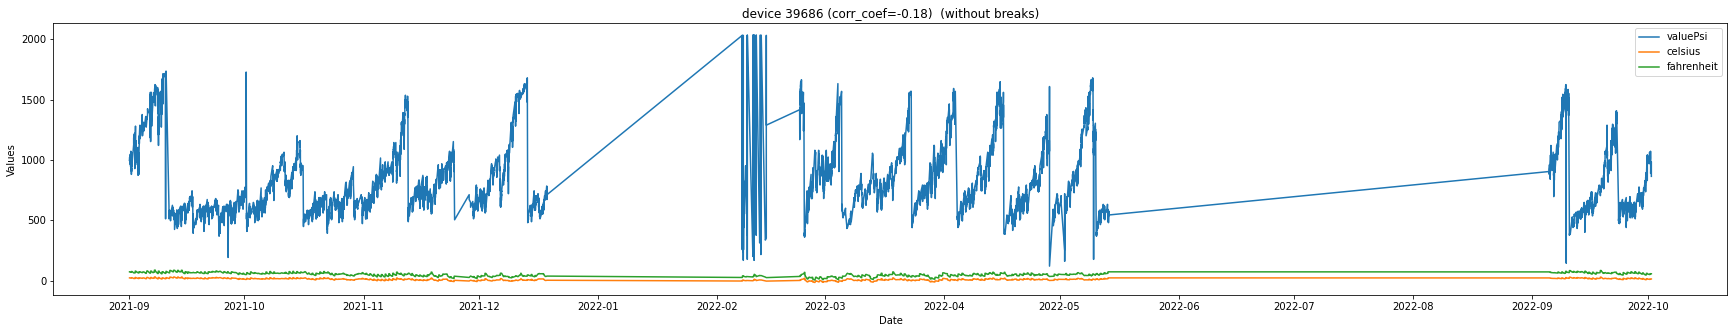

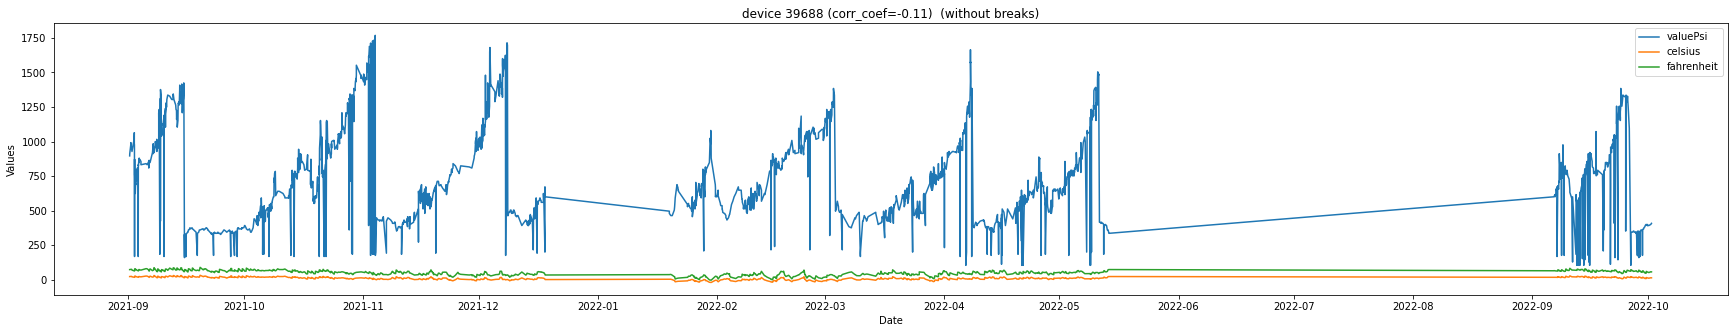

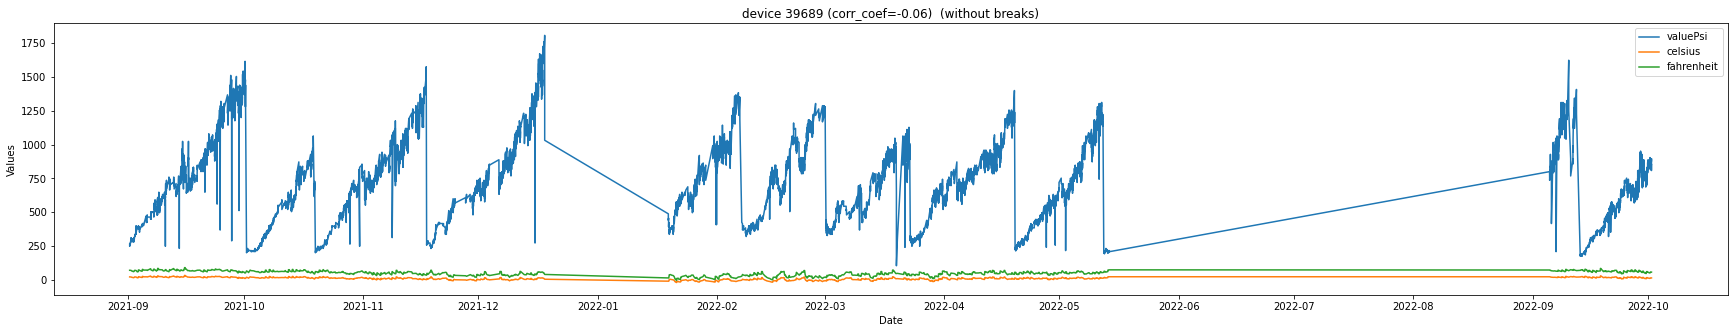

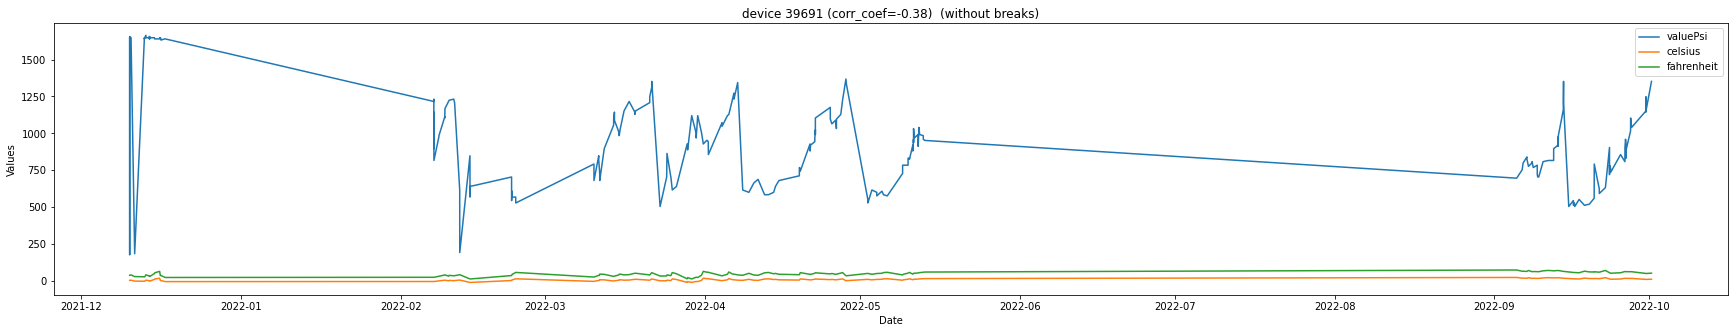

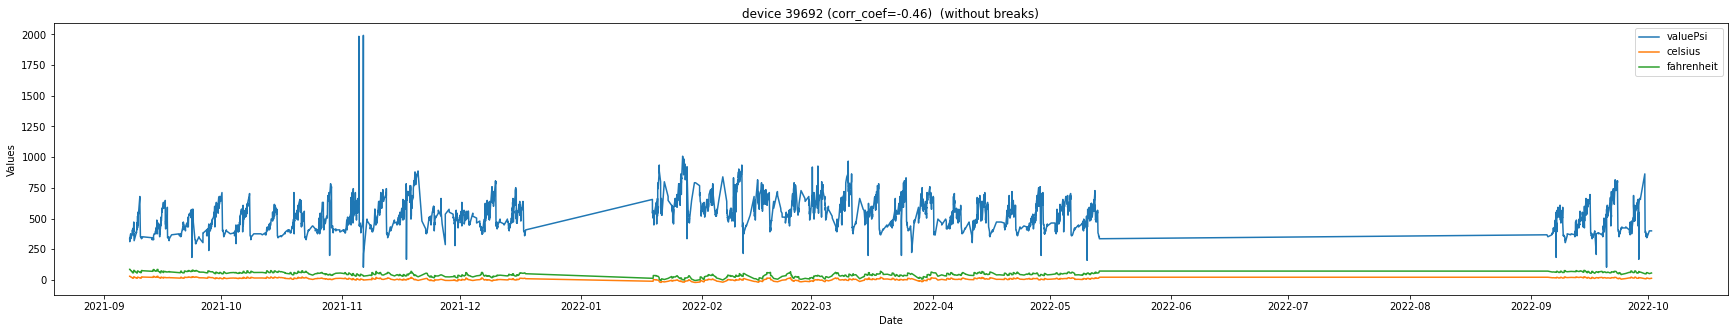

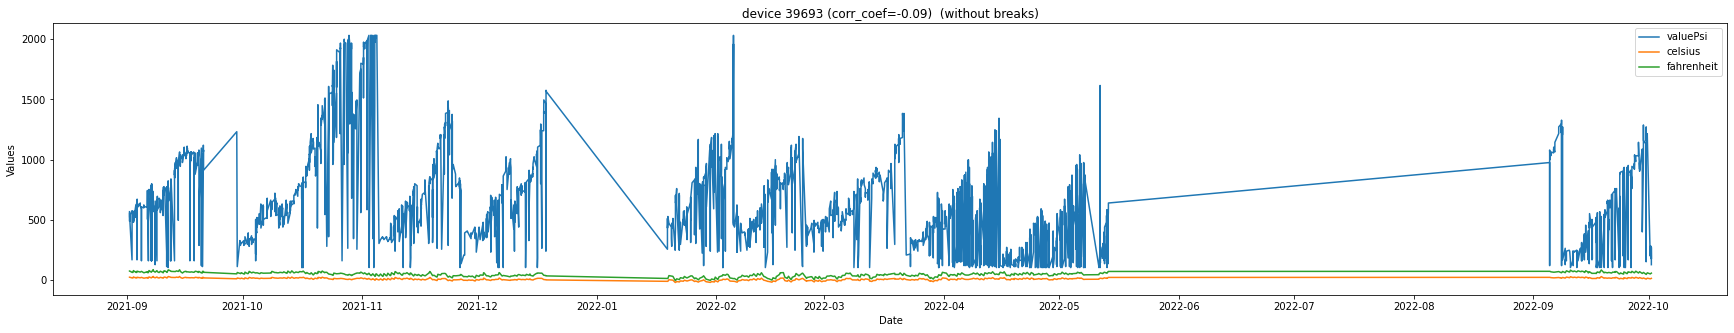

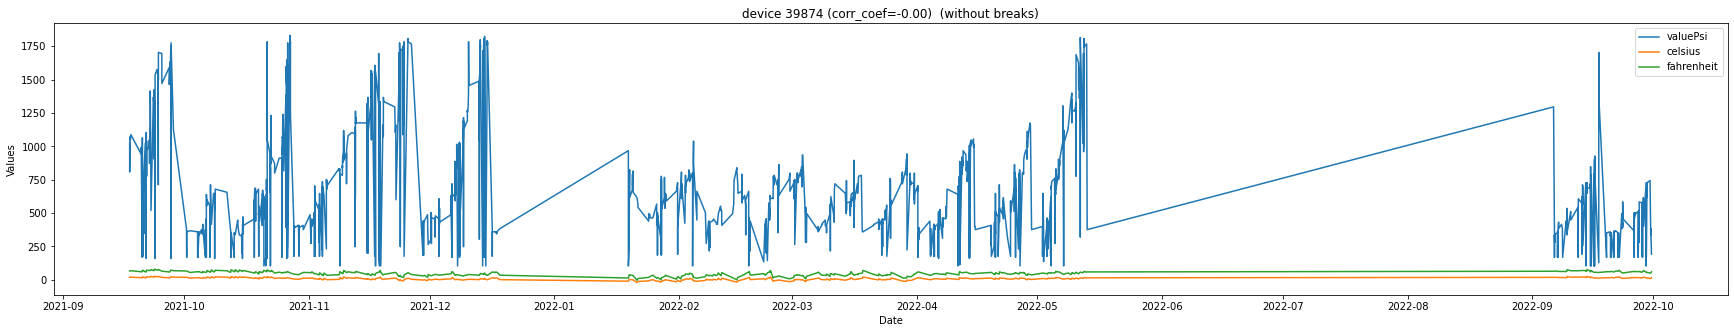

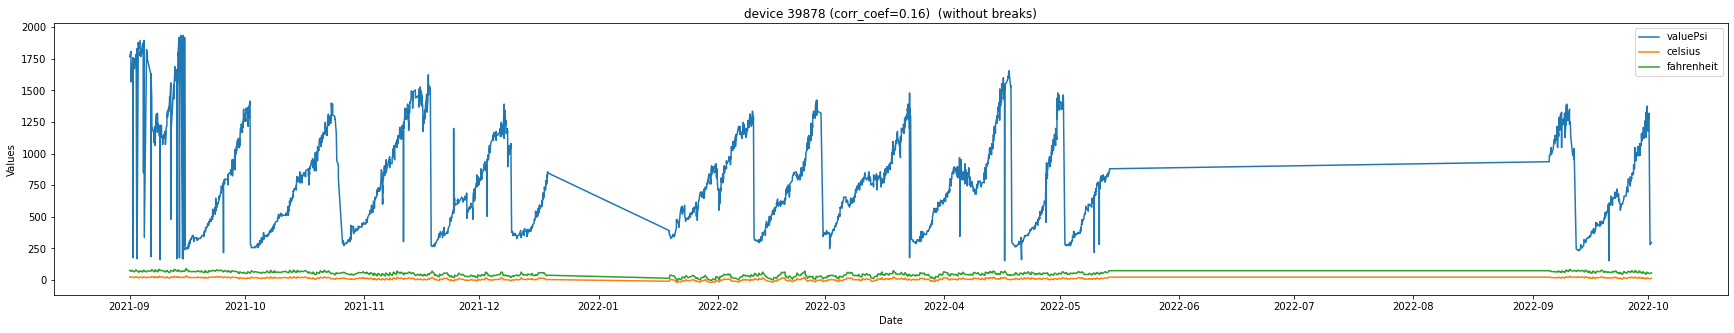

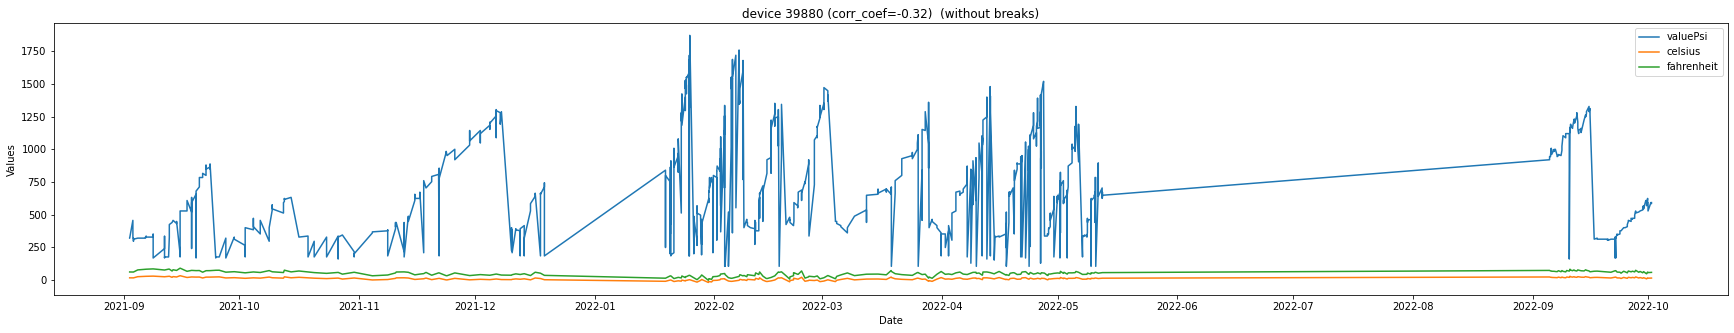

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
from scipy.stats import pearsonr

# Set the directory path where the CSV files are stored
directory = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/Combined_devices_without_breaks'

# List all the CSV files in the directory and sort them by file name
csv_files = sorted([file for file in os.listdir(directory) if file.endswith('.csv')])

# Create a PDF file to save the plots
pdf_pages = PdfPages('lineChart_for_each_device_without_breaks.pdf')

# Loop over each CSV file and plot it
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, parse_dates=['readingDtUtz'], index_col='readingDtUtz')
    df = df.dropna()
    # Extract the five-digit device number from the file name
    device_number = file.split('_')[1]
    # Calculate the correlation coefficient between temperature and valuePsi
    valid_dates = df.index[df.index.notnull()]
    corr_coef, _ = pearsonr(df.loc[valid_dates, 'fahrenheit'], df.loc[valid_dates, 'valuePsi'])
    # Create the plot
    fig, ax = plt.subplots(figsize=(30, 5))
    ax.plot(df.index, df['valuePsi'].where(df.index.notnull()), label='valuePsi')
    ax.plot(df.index, df['celsius'].where(df.index.notnull()), label='celsius')
    ax.plot(df.index, df['fahrenheit'].where(df.index.notnull()), label='fahrenheit')
    ax.set_title(f"device {device_number} (corr_coef={corr_coef:.2f})  (without breaks)")
    ax.set_xlabel('Date')
    ax.set_ylabel('Values')
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.legend()
    # Save the plot to the PDF file
    pdf_pages.savefig()
    plt.show()
    plt.close()

# Close the PDF file
pdf_pages.close()


device 39569 has coef: -0.3842037670722672
device 39600 has coef: 0.26508939554804545
device 39668 has coef: -0.2458588269050617
device 39671 has coef: 0.2779528761045584
device 39673 has coef: -0.3254031472873719
device 39685 has coef: -0.275609922517503
device 39691 has coef: -0.37659966139025836
device 39692 has coef: -0.454415193967332
device 39880 has coef: -0.31642078044101757


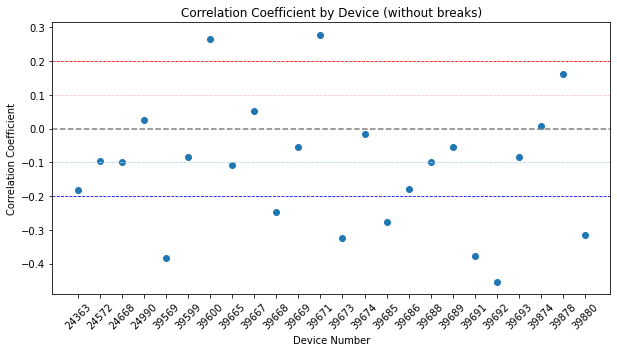

In [77]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the directory path where the CSV files are stored
directory = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/Combined_devices_without_breaks'

# List all the CSV files in the directory and sort them by file name
csv_files = sorted([file for file in os.listdir(directory) if file.endswith('.csv')])

# Initialize lists to store the device numbers and their corresponding correlation coefficients
device_nums = []
correlation_coeffs = []
useful_devices_without_break = {}
device_without_break_corr = {}

# Loop over each CSV file and compute the correlation coefficient
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df = df.dropna()
    corr_coef = df['fahrenheit'].corr(df['valuePsi'])
#     print(corr_coef)
    device_num = file.split('_')[1]
    device_nums.append(device_num)
    correlation_coeffs.append(corr_coef)
    
    if abs(corr_coef) >= 0.2:
        print("device",device_num, "has coef:", corr_coef)
        useful_devices_without_break[device_num] = round(corr_coef,2)
    device_without_break_corr[device_num] = round(corr_coef,2)

# Plot a scatter plot of the correlation coefficients for each device
plt.figure(figsize=(10, 5))
plt.scatter(device_nums, correlation_coeffs)
plt.xlabel('Device Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient by Device (without breaks)')
plt.xticks(rotation=45)
plt.axhline(y=0.1, linestyle='--', color='pink', linewidth=0.8)
plt.axhline(y=-0.1, linestyle='--', color='lightblue', linewidth=0.8)
plt.axhline(y=0.2, linestyle='--', color='red', linewidth=0.8)
plt.axhline(y=-0.2, linestyle='--', color='blue', linewidth=0.8)
plt.axhline(y=0, linestyle='--', color='gray')
plt.savefig('Correlation_Coefficient_by_Device_without_breaks.png')
plt.show()


Now contains only breaks

In [3]:
import csv
import os
from datetime import datetime

# Define date ranges to include
include_dates = [
    (datetime(2021, 5, 23), datetime(2021, 9, 1)),
    (datetime(2021, 12, 19), datetime(2022, 1, 19)),
    (datetime(2022, 5, 14), datetime(2022, 9, 5))
]

# Define input and output directories
input_dir = "C:/Users/67246/Documents/GitHub/CS506Private/Project/Data/Processed/combined_reading_device_all"
output_dir = "C:/Users/67246/Documents/GitHub/CS506Private/Project/Data/Processed/Combined_devices_only_breaks"

# Loop through input files
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Define output filename
        output_filename = filename[:-4] + "_during_breaks.csv"
        # Open input and output files
        with open(os.path.join(input_dir, filename), "r") as input_file, \
             open(os.path.join(output_dir, output_filename), "w", newline="") as output_file:
            # Create CSV reader and writer objects
            reader = csv.DictReader(input_file)
            writer = csv.DictWriter(output_file, fieldnames=reader.fieldnames)
            writer.writeheader()
            # Loop through rows in input file
            for row in reader:
                # Convert readingDtUtz attribute to datetime object
                reading_dt = datetime.fromisoformat(row["readingDtUtz"])
                # Check if readingDtUtz falls within any of the included date ranges
                include = False
                for start_date, end_date in include_dates:
                    if start_date <= reading_dt <= end_date:
                        include = True
                        break
                # Write row to output file if it falls within any included date ranges
                if include:
                    writer.writerow(row)


device 24363 has coef: -0.5951449037089638
device 24990 has coef: 0.31680055496925213
device 39569 has coef: 0.2899082178817625
device 39599 has coef: 0.20974073872844157
device 39667 has coef: -0.3047529606771425
device 39668 has coef: -0.3376025548635856
device 39673 has coef: -0.354156614801385
device 39685 has coef: -0.28956868850159684
device 39686 has coef: -0.39144159347134727
device 39692 has coef: -0.41511296478939125
device 39693 has coef: -0.2959188063711509
device 39874 has coef: -0.21055163205389096
device 39878 has coef: -0.21774729991346473
device 39880 has coef: -0.3734226730055244


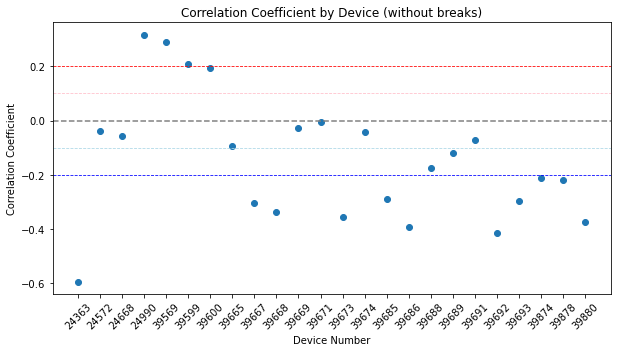

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the directory path where the CSV files are stored
directory = 'C:/Users/67246/Documents/GitHub/CS506Private/Project/Data/Processed/Combined_devices_only_breaks'

# List all the CSV files in the directory and sort them by file name
csv_files = sorted([file for file in os.listdir(directory) if file.endswith('.csv')])

# Initialize lists to store the device numbers and their corresponding correlation coefficients
device_nums = []
correlation_coeffs = []
useful_devices_without_break = {}
device_without_break_corr = {}

# Loop over each CSV file and compute the correlation coefficient
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df = df.dropna()
    corr_coef = df['fahrenheit'].corr(df['valuePsi'])
#     print(corr_coef)
    device_num = file.split('_')[1]
    device_nums.append(device_num)
    correlation_coeffs.append(corr_coef)
    
    if abs(corr_coef) >= 0.2:
        print("device",device_num, "has coef:", corr_coef)
        useful_devices_without_break[device_num] = round(corr_coef,2)
    device_without_break_corr[device_num] = round(corr_coef,2)

# Plot a scatter plot of the correlation coefficients for each device
plt.figure(figsize=(10, 5))
plt.scatter(device_nums, correlation_coeffs)
plt.xlabel('Device Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient by Device (without breaks)')
plt.xticks(rotation=45)
plt.axhline(y=0.1, linestyle='--', color='pink', linewidth=0.8)
plt.axhline(y=-0.1, linestyle='--', color='lightblue', linewidth=0.8)
plt.axhline(y=0.2, linestyle='--', color='red', linewidth=0.8)
plt.axhline(y=-0.2, linestyle='--', color='blue', linewidth=0.8)
plt.axhline(y=0, linestyle='--', color='gray')
plt.savefig('Correlation_Coefficient_by_Device_without_breaks.png')
plt.show()


If we consider ±0.2 as a boundary to decide there is some relationship. Then we can look at these listed below



In [19]:
print(useful_devices_without_break)
print()
print(device_without_break_corr)

{'39569': -0.38, '39600': 0.27, '39668': -0.25, '39671': 0.28, '39673': -0.33, '39685': -0.28, '39691': -0.38, '39692': -0.45, '39880': -0.32}

{'24363': -0.18, '24572': -0.1, '24668': -0.1, '24990': 0.03, '39569': -0.38, '39599': -0.08, '39600': 0.27, '39665': -0.11, '39667': 0.05, '39668': -0.25, '39669': -0.05, '39671': 0.28, '39673': -0.33, '39674': -0.01, '39685': -0.28, '39686': -0.18, '39688': -0.1, '39689': -0.06, '39691': -0.38, '39692': -0.45, '39693': -0.08, '39874': 0.01, '39878': 0.16, '39880': -0.32}


Now we are plotting these devices into a map

In [23]:
print(useful_devices_whole_dates)
print()
print(device_whole_dates_corr)
print()
print(useful_devices_without_break )
print()
print(device_without_break_corr)

{'24363': -0.33, '39600': 0.29, '39668': -0.27, '39673': -0.35, '39685': -0.34, '39686': -0.22, '39691': -0.43, '39692': -0.5, '39693': -0.2, '39880': -0.32}

{'24363': -0.33, '24572': -0.1, '24668': -0.11, '24990': 0.06, '39569': 0.19, '39599': -0.0, '39600': 0.29, '39665': -0.08, '39667': -0.13, '39668': -0.27, '39669': -0.1, '39671': 0.17, '39673': -0.35, '39674': -0.01, '39685': -0.34, '39686': -0.22, '39688': -0.18, '39689': -0.13, '39691': -0.43, '39692': -0.5, '39693': -0.2, '39874': -0.07, '39878': 0.06, '39880': -0.32}

{'39569': -0.38, '39600': 0.27, '39668': -0.25, '39671': 0.28, '39673': -0.33, '39685': -0.28, '39691': -0.38, '39692': -0.45, '39880': -0.32}

{'24363': -0.18, '24572': -0.1, '24668': -0.1, '24990': 0.03, '39569': -0.38, '39599': -0.08, '39600': 0.27, '39665': -0.11, '39667': 0.05, '39668': -0.25, '39669': -0.05, '39671': 0.28, '39673': -0.33, '39674': -0.01, '39685': -0.28, '39686': -0.18, '39688': -0.1, '39689': -0.06, '39691': -0.38, '39692': -0.45, '39693'

In [90]:
import pandas as pd
import folium

path = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/Device Geo Locations.csv'
# Read the CSV file into a pandas dataframe
df = pd.read_csv(path)

# Create a dictionary of device numbers and their correlation coefficients
corr_dict = device_whole_dates_corr

# Create a map centered on the first device's location
map = folium.Map(location=[42.34, df['Longitude'][0]], zoom_start=13.5)

# Define the HTML template for the popup
popup_template = """
<div style="font-size: 16px;">
    <strong>Device No.:</strong> {device_num}<br>
    <strong>Site Name:</strong> {site_name}<br>
    <strong>Correlation Coefficient:</strong> {correlation:.2f}
</div>
"""

# Loop through each device number in the dictionary
for device_num, correlation in corr_dict.items():
    # Find the row in the dataframe with the matching device number
    device_row = df.loc[df['Device No.'] == int(device_num)]
    
    # If there is a matching row, add a marker for the device to the map
    if not device_row.empty:
        site_name = device_row.iloc[0]['Site']
        color = 'gray'  # Default color
        if correlation >= 0.2:
            color = 'red'
        elif correlation >= 0.1:
            color = 'lightred'
        elif correlation <= -0.2:
            color = 'blue'
        elif correlation <= -0.1:
            color = 'lightblue'

        # Add a marker for the device to the map with a popup showing device information
        popup_text = popup_template.format(device_num=device_num, site_name=site_name, correlation=correlation)
        folium.Marker(location=[device_row.iloc[0]['Latitude'], device_row.iloc[0]['Longitude']], 
                      popup=popup_text, icon=folium.Icon(color=color)).add_to(map)

# Save the map to an HTML file
map.save('device_map_including_breaks.html')
map

In [91]:
import pandas as pd
import folium

path = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/Device Geo Locations.csv'
# Read the CSV file into a pandas dataframe
df = pd.read_csv(path)

# Create a dictionary of device numbers and their correlation coefficients
corr_dict = device_without_break_corr

# Create a map centered on the first device's location
map = folium.Map(location=[42.34, df['Longitude'][0]], zoom_start=13.5)

# Define the HTML template for the popup
popup_template = """
<div style="font-size: 16px;">
    <strong>Device No.:</strong> {device_num}<br>
    <strong>Site Name:</strong> {site_name}<br>
    <strong>Correlation Coefficient:</strong> {correlation:.2f}
</div>
"""

# Loop through each device number in the dictionary
for device_num, correlation in corr_dict.items():
    # Find the row in the dataframe with the matching device number
    device_row = df.loc[df['Device No.'] == int(device_num)]
    
    # If there is a matching row, add a marker for the device to the map
    if not device_row.empty:
        site_name = device_row.iloc[0]['Site']
        color = 'gray'  # Default color
        if correlation >= 0.2:
            color = 'red'
        elif correlation >= 0.1:
            color = 'lightred'
        elif correlation <= -0.2:
            color = 'blue'
        elif correlation <= -0.1:
            color = 'lightblue'
        # Add a marker for the device to the map with a popup showing device information
        popup_text = popup_template.format(device_num=device_num, site_name=site_name, correlation=correlation)
        folium.Marker(location=[device_row.iloc[0]['Latitude'], device_row.iloc[0]['Longitude']], 
                      popup=popup_text, icon=folium.Icon(color=color)).add_to(map)

# Save the map to an HTML file
map.save('device_map_without_breaks.html')
map